### Principal component analysis (PCA) ###

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/drive', force_remount=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path='/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/Example.csv'

data=pd.read_csv(path, sep='\s+', header=None)
data_std=(data-data.mean())/data.std()

In [4]:
data

,0,1,2,3
0,6,5,3,4
1,7,3,2,2
2,6,4,4,5
3,5,7,1,3
4,7,7,5,5
5,6,4,2,3
6,5,7,2,1
7,6,5,4,4
8,3,5,6,7
9,1,3,7,5


In [ ]:
At=data.values
#we have to use the transpose of this value accordingly to the project description.
#The matrix is m x n where m is the amount of variables and n the number of observations.
A=At.T

In [ ]:
print(A)

[[6 7 6 5 7 6 5 6 3 1 2 5 2 3 1 2]
 [5 3 4 7 7 4 7 5 5 3 6 7 4 5 6 3]
 [3 2 4 1 5 2 2 4 6 7 6 7 5 6 5 7]
 [4 2 5 3 5 3 1 4 7 5 7 6 6 5 5 7]]


In [ ]:
#Now we perform the PCA on the correlation matrix and on the covariance matrix.
#For the correlation matrix: let X the matrix obtained by substracting the mean of each row of the matrix A.
mean_rows = np.mean(A, axis=1)
cov = A - mean_rows[:, np.newaxis]
#for the covariance we have to divide by standard deviation of each row of the matrix A
std_rows = np.std(A, axis=1)
corr = np.divide(cov, std_rows[:, np.newaxis])

In [ ]:
mean_rows

array([4.1875, 5.0625, 4.5   , 4.6875])

### PCA ON CORRELATION MATRIX ###

In [ ]:
Y=1/np.sqrt(data.shape[0]-1)*(corr.T) #hence Y.TY coincides with cov
r=np.linalg.matrix_rank(Y) #the rank is 4
#here we perform the svd on Y
U,S,VT=np.linalg.svd(Y)

In [ ]:
#now s_i^2=lambda_i. Then var_tot=sum lambda_i and the proportion of each component is s_i^2/var_tot
var_tot=np.sum(S**2)
#hence the the portion of the total variance in each of the principal components is
var_component=[]
for s in S:
  var_component.append(s**2/var_tot)

pca_coordinates = VT.dot(corr)
print('Variance explained by each principal component:', var_component)
print('Standard deviation of each principal component:',S)
print('\n')
print('Expression of the original dataset in the new PCA coordinates:\n',pca_coordinates)


Variance explained by each principal component: [0.6075727481395342, 0.24030055128594713, 0.11616758744465837, 0.03595911312986046]
Standard deviation of each principal component: [0.02576407 0.0162029  0.01126569 0.00626787]


Expression of the original dataset in the new PCA coordinates:
 [[-1.14520929 -2.13579331 -0.3753926  -2.09369303 -0.69056863 -1.66810444
  -2.46227084 -0.83716461  1.55237366  1.93639418  1.68175129  0.76950876
   1.28231691  0.87575117  0.94992252  2.36017827]
 [-0.20585347 -1.82692136 -0.72038791  0.91650704  1.39486696 -1.0528595
   0.7911549  -0.13681365  0.28114087 -1.21356043  0.95800676  1.62233387
  -0.5697695   0.08674892  0.69067064 -1.01526413]
 [-0.35127392 -0.28494506 -0.832809    0.7763731  -1.14474846 -0.03682508
   1.11523239 -0.50364879 -0.31466795  0.677493    0.17906912 -0.8747274
   0.40997484  0.17656622  1.23287211 -0.22393512]
 [-0.22821265  0.19505665 -0.25015836 -0.61540022  0.19864877 -0.22610387
   0.54624598  0.15098459 -0.38385788  

Text(0, 0.5, 'Principal Component 2')

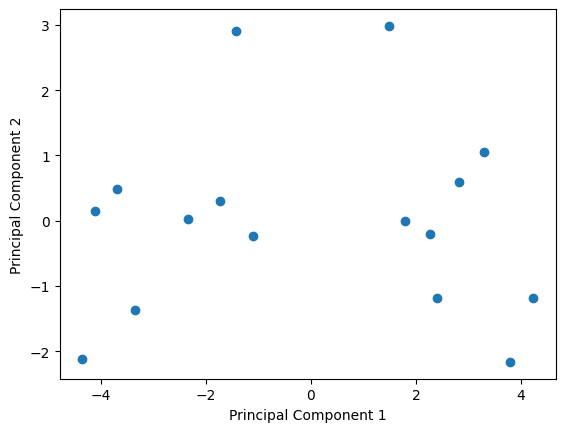

In [ ]:
plt.scatter(pca_coordinates[0,:],pca_coordinates[1,:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [ ]:
#Now if we use the elbow rule (scree plot criterion) we can easily deduce that the first two components are sufficient to explain the data.

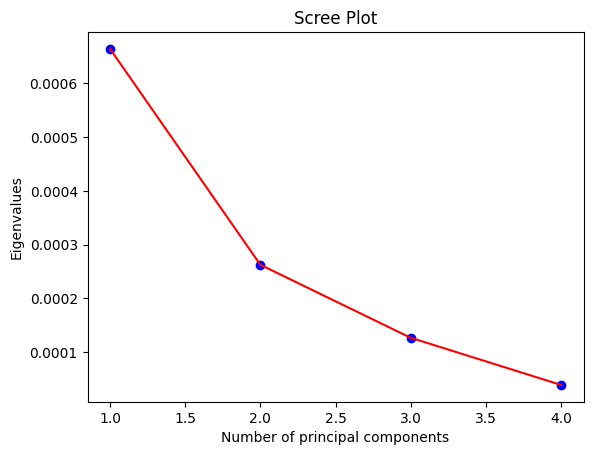

In [ ]:
plt.scatter(np.arange(1, 5, 1), S**2, color='b')
plt.plot(np.arange(1, 5, 1), S**2, linestyle='-', color='r')
plt.xlabel('Number of principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

### PCA ON COVARIANCE MATRIX

In [ ]:
Y=1/np.sqrt(data.shape[0]-1)*(cov.T) #hence Y.TY coincides with cov
r=np.linalg.matrix_rank(Y) #the rank is 4
U,S,VT=np.linalg.svd(Y)

In [ ]:
var_tot=np.sum(S**2)
var_component=[]
for s in S:
  var_component.append(s**2/var_tot)

pca_coordinates = VT.dot(cov)
print('Variance explained by each principal component:', var_component)
print('Standard deviation of each principal component:',S)
print('\n')
print('Expression of the original dataset in the new PCA coordinates:\n',pca_coordinates)

Variance explained by each principal component: [0.6697934657249137, 0.15887735408214634, 0.1345231628239306, 0.03680601736900931]
Standard deviation of each principal component: [0.04886231 0.02379768 0.02189788 0.01145415]


Expression of the original dataset in the new PCA coordinates:
 [[-2.33616589 -4.35336868 -1.10570266 -3.68471106 -1.42180965 -3.34953464
  -4.11264074 -1.73086512  2.81688024  3.79757714  3.30409906  1.49693922
   2.39927754  1.7836498   2.2613339   4.23504154]
 [ 0.02763159 -2.12675047 -0.24063832  0.48403484  2.90827971 -1.37262419
   0.15458217  0.29514266  0.58975511 -2.1654601   1.04539952  2.98454685
  -1.1891191  -0.00720863 -0.19769371 -1.18987794]
 [-0.6113487  -1.42283085 -1.79814637  2.14002302 -1.20204912 -0.50488667
   2.47946554 -0.92928776 -0.43183679  0.24020439  0.81479819 -0.75368372
   0.3810924   0.22554479  2.49658599 -1.12364434]
 [-0.42371803  0.37065439 -0.49789879 -1.05860044  0.29523406 -0.39157212
   1.08455516  0.25522494 -0.73662089 

Text(0, 0.5, 'Principal Component 2')

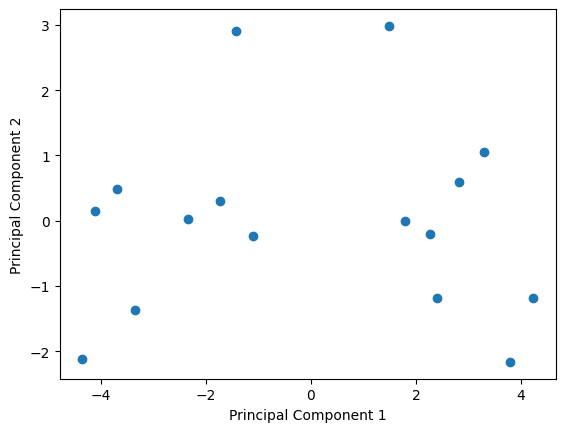

In [ ]:
plt.scatter(pca_coordinates[0,:],pca_coordinates[1,:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

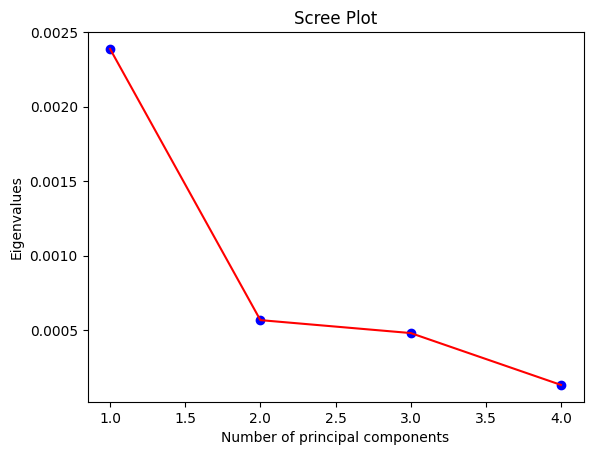

In [ ]:
plt.scatter(np.arange(1, 5, 1), S**2, color='b')
plt.plot(np.arange(1, 5, 1), S**2, linestyle='-', color='r')
plt.xlabel('Number of principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

#Here the scree plot does not help, but we can apply the kaiser rule: we take only components with eigenvalue greater than 1.
#So we can still use the first 2 components.

### FINAL PART: DATASET RCsGoff.csv ###

In [6]:
path='/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/RCsGoff.csv'
data=pd.read_csv(path, sep=',')

In [7]:
data.head(10)

,gene,day0_rep1,day0_rep2,day0_rep3,day1_rep1,day1_rep2,day1_rep3,day2_rep1,day2_rep2,day2_rep3,...,day4_rep2,day4_rep3,day5_rep1,day5_rep2,day11_rep1,day11_rep2,day11_rep3,day18_rep1,day18_rep2,day18_rep3
0,DDX11L1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,2,0
1,WASH7P,1113,897,1498,2130,2047,1876,1366,1359,1439,...,2635,2242,4500,2303,2714,3056,3332,3393,2846,2585
2,MIR6859-1,8,9,18,28,15,24,13,15,14,...,20,12,47,16,25,30,40,24,29,31
3,RP11-34P13.3,0,0,0,3,4,4,3,1,0,...,4,0,0,0,1,5,0,2,0,0
4,MIR1302-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FAM138A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
6,OR4G4P,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,OR4G11P,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,OR4F5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,RP11-34P13.7,2,0,6,9,16,11,6,7,9,...,17,8,20,8,16,22,29,22,20,18


In [8]:
data=data.drop(columns='gene',axis=0)

In [11]:
#Here I center the data for each observation by subtracting the mean of the observations for each variable
X=data.values
means = np.mean(X, axis=1, keepdims=True)

cov_data= X - means

In [12]:
cov_data.shape

(58581, 20)

In [13]:
Y=1/(np.sqrt(cov_data.shape[0]-1))*cov_data.T
U,S,VT=np.linalg.svd(Y,full_matrices=False)

In [14]:
var_tot=np.sum(S**2)
var_component=[]
for s in S:
  var_component.append(s**2/var_tot)

pca_coordinates = VT.dot(cov_data)
print('Variance explained by each principal component:', var_component)
print('Standard deviation of each principal component:',S)

Variance explained by each principal component: [0.7229910666292577, 0.15784466329358413, 0.06688876934662345, 0.02887354613885144, 0.012262572150577333, 0.004613075563520706, 0.0036272514133684976, 0.0015754926618311447, 0.000411913267489293, 0.00031373518005236125, 0.00011735509956516491, 0.00010628705324079593, 0.00010247242128312631, 8.102081526518717e-05, 5.173872760386865e-05, 4.3690914183811e-05, 4.0218837810170524e-05, 2.9526644906938986e-05, 2.5603840984792658e-05, 1.1552431590294224e-28]
Standard deviation of each principal component: [9.45226829e+03 4.41656398e+03 2.87505513e+03 1.88894641e+03
 1.23100655e+03 7.55031132e+02 6.69512059e+02 4.41242937e+02
 2.25617335e+02 1.96902479e+02 1.20426082e+02 1.14606634e+02
 1.12531232e+02 1.00061700e+02 7.99608582e+01 7.34793220e+01
 7.04992234e+01 6.04055197e+01 5.62499493e+01 1.19483044e-10]


Text(0, 0.5, 'Principal Component 2')

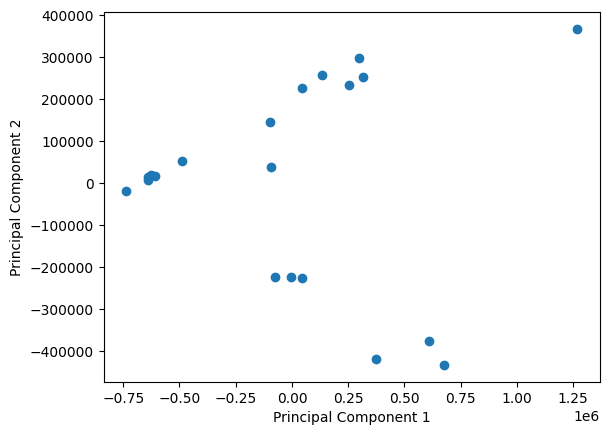

In [15]:
plt.scatter(pca_coordinates[0,:],pca_coordinates[1,:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

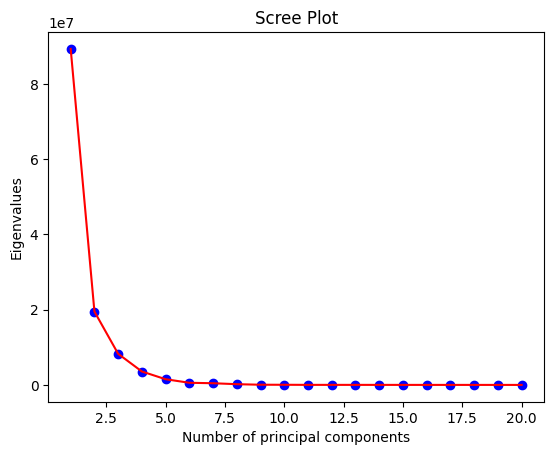

In [16]:
plt.scatter(np.arange(1, 21, 1), S**2, color='b')
plt.plot(np.arange(1, 21, 1), S**2, linestyle='-', color='r')
plt.xlabel('Number of principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

We now present the data in the form Sample,PC1,PC2,. . . ,PC20,Portion of variance

In [52]:
portion_of_variance=np.array(var_component)
portion_of_variance=portion_of_variance.reshape(-1,1)
values=np.concatenate((pca_coordinates.T,portion_of_variance), axis=1)
output_columns = ['PC' + str(i) for i in range(1, 21)] + ['Portion of Variance']
output_component=pd.DataFrame(values, columns = output_columns)
output_component.index = pd.RangeIndex(start=0, stop=20, step=1)

# Aggiungi la colonna "Sample" ai dati
output_component.insert(0, 'Sample', data.columns)


In [53]:
output_component

,Sample,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Portion of Variance
0,day0_rep1,-7.371665e+05,-18654.586943,-164214.491213,-33261.510936,54946.952587,7870.620231,786.744623,31877.107402,-4936.602235,...,3917.408877,-3005.571229,1613.753372,-616.083917,4493.558353,-7045.606907,8315.616043,-793.109592,-1.931010e-08,7.229911e-01
1,day0_rep2,-6.108082e+05,16615.789612,-199713.263901,-89598.672155,120567.552631,494.306035,-19679.296363,-69062.596558,2339.920761,...,-5034.084079,2607.727616,-2056.105292,785.385926,-1358.404064,-157.584562,-61.262506,600.789352,-1.840576e-08,1.578447e-01
2,day0_rep3,-4.885996e+05,52940.054655,-316005.864682,-53233.762939,70854.099458,-8570.249993,-20065.245125,50778.082980,6063.366044,...,1176.337736,185.364116,452.417603,57.844759,-2061.625392,5475.125829,-5994.393031,132.150611,-1.334539e-08,6.688877e-02
3,day1_rep1,4.348264e+04,-227207.612775,47294.736355,-114576.897210,-47120.453275,-68853.582214,8901.137978,-17000.890323,-7803.916256,...,-8605.218394,-755.983947,-7539.724940,275.256588,1618.100749,-963.444080,1161.149129,2856.569383,8.157682e-09,2.887355e-02
4,day1_rep2,-3.686274e+03,-224777.225182,49945.794488,-97746.569924,-55659.565494,-75027.185660,13069.651990,17972.242818,5355.134746,...,-1943.336459,9034.056424,6601.490731,-9193.492193,74.619037,-2994.997938,-1651.922275,-660.431008,6.420785e-09,1.226257e-02
5,day1_rep3,-7.367140e+04,-224216.606867,74303.809368,-106981.158073,-40119.921618,-64246.730974,15065.024633,-8657.633258,5639.185962,...,11910.568220,-8262.088660,1708.616680,8651.891465,-2490.989659,4190.035724,428.178181,-2479.846901,4.157339e-09,4.613076e-03
6,day2_rep1,-6.411675e+05,15269.551427,139178.340565,68522.818959,-18384.681611,38217.747701,33612.259877,-18041.226682,10993.995572,...,1197.904779,2218.322724,-255.419625,-3786.522820,-5121.267455,-679.230654,426.211787,-8502.441702,-1.457508e-08,3.627251e-03
7,day2_rep2,-6.391345e+05,6240.986687,143593.594437,65834.089230,-28454.002780,22349.371355,21656.905341,-5024.330415,7039.336736,...,542.689029,-3754.531883,-254.863035,3063.014964,12674.670014,-1224.525054,-5505.323503,544.300779,-1.694309e-08,1.575493e-03
8,day2_rep3,-6.249436e+05,18917.775358,140259.210599,84468.528955,-31131.880903,27285.801221,32754.229078,9837.845272,20413.343525,...,-2536.020120,-1.431960,401.078043,-347.894243,-5253.119477,3113.305157,3405.743482,8470.379466,-1.812276e-08,4.119133e-04
9,day4_rep1,3.156581e+05,252023.173366,233259.388171,-21081.867913,43741.762089,-9069.463068,-59447.435834,18166.691398,6803.917336,...,-999.499699,3187.743760,141.838912,8053.614632,-4444.615831,-8695.660792,-1580.188371,356.588654,-4.414351e-08,3.137352e-04
